In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install simpletransformers

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 250.8/250.8 kB 4.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.7/7.7 MB 66.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 519.6/519.6 kB 41.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43.6/43.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.8/3.8 MB 82.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 97.9 MB/s eta 0:00:

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from simpletransformers.classification import ClassificationModel, ClassificationArgs

In [ ]:
train_set = pd.read_csv("/content/gdrive/MyDrive/TamilNLP/ta-misogyny-train.csv",header=None,sep='\t')
validation_set = pd.read_csv("/content/gdrive/MyDrive/TamilNLP/ta-misogyny-dev.csv",header=None,sep='\t')
test_set = pd.read_csv("/content/gdrive/MyDrive/TamilNLP/tamil_test_with_labels.csv", header=None)
prediction_set = pd.read_csv("/content/gdrive/MyDrive/TamilNLP/tamil_test_without_labels.csv", header=None)
print(f"Training data : {train_set.shape} \nValidation data : {validation_set.shape} \nTest data : {test_set.shape} \nPrediction data : {prediction_set.shape}")

Training data : (2240, 2) 
Validation data : (560, 2) 
Test data : (699, 2) 
Prediction data : (699, 1)


In [ ]:
def modify_dataset(df):
  df.rename(columns={0:'Label', 1:'Text'}, inplace=True)
  df = df[['Text', 'Label']]
  return df
train_set = modify_dataset(train_set)
validation_set = modify_dataset(validation_set)
test_set = modify_dataset(test_set)
prediction_set = prediction_set.rename(columns={0:'Text'})

None-of-the-above    1296
Misandry              446
Counter-speech        149
Misogyny              125
Xenophobia             95
Hope-Speech            86
Homophobia             35
Transphobic             6
Not-Tamil               2
Name: Label, dtype: int64


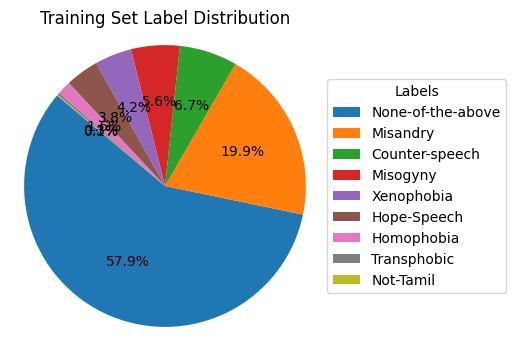

In [ ]:
category_counts = train_set['Label'].value_counts()
print(category_counts)
plt.figure(figsize=(4, 4))
wedges, labels, autopct = plt.pie(category_counts, autopct='%1.1f%%', startangle=140)
plt.legend(wedges, category_counts.index, title='Labels', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Training Set Label Distribution')
plt.axis('equal')
plt.show()

In [ ]:
num_labels = len(train_set['Label'].unique())
keys = list(train_set['Label'].unique())
values = list(range(0, num_labels))
label_dict = dict(zip(keys,values))
train_set['Label'] = train_set['Label'].apply(lambda x:label_dict[x])
test_set['Label'] = test_set['Label'].apply(lambda x:label_dict[x])
validation_set['Label'] = validation_set['Label'].apply(lambda x:label_dict[x])
label_dict

{'Hope-Speech': 0,
 'None-of-the-above': 1,
 'Homophobia': 2,
 'Misandry': 3,
 'Counter-speech': 4,
 'Misogyny': 5,
 'Xenophobia': 6,
 'Transphobic': 7,
 'Not-Tamil': 8}

In [ ]:
def oversample(df):
        classes = df['Label'].value_counts().to_dict()
        most = max(classes.values())
        classes_list = []
        for key in classes:
            classes_list.append(df[df['Label'] == key])
        classes_sample = []
        for i in range(1,len(classes_list)):
            classes_sample.append(classes_list[i].sample(most, replace=True))
        df_maybe = pd.concat(classes_sample)
        final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
        final_df = final_df.reset_index(drop=True)
        return pd.DataFrame({'Text': final_df['Text'].tolist(), 'Label': final_df['Label'].tolist()})

In [ ]:
def over_under_sample(df):
  unq_labels = list(set(df['Label'].tolist()))
  texts = df['Text'].tolist()
  labels = df['Label'].tolist()
  data_dict = dict()

  for l in unq_labels:
    data_dict[l] = []

  for i in range(len(texts)):
    data_dict[labels[i]].append(texts[i])

  req_len = len(labels)//len(unq_labels)

  for label in data_dict:
    if len(data_dict[label]) > req_len:
      data_dict[label] = data_dict[label][:req_len]

    new_texts = []

    new_labels = []
    for l in data_dict:
      new_texts += data_dict[l]
      new_labels += [l]*len(data_dict[l])
    return oversample(pd.DataFrame({'Text': new_texts, 'Label': new_labels}))

In [ ]:
category_counts = train_set['Label'].value_counts()
print(category_counts)
plt.figure(figsize=(4, 4))
wedges, labels, autopct = plt.pie(category_counts, autopct='%1.1f%%', startangle=140)
plt.legend(wedges, category_counts.index, title='Labels', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Training Set Label Distribution')
plt.axis('equal')
plt.show()

In [ ]:
epochs=3
model_args = ClassificationArgs()
model_args.overwrite_output_dir=True
model_args.eval_batch_size=8
model_args.train_batch_size=32
model_args.learning_rate=4e-5
model_args.save_model_every_epoch = True

In [ ]:
model = ClassificationModel(
    'bert',
    'google/muril-base-cased',
    num_labels=9,
    args=model_args,
    use_cuda=True,
    tokenizer_type="bert",
    tokenizer_name='google/muril-base-cased'
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_losses = []
train_accuracies = []

for i in range(epochs):
    model.train_model(training_set,eval_data=validation_set,acc=sklearn.metrics.classification_report)
    result, model_outputs, preds_list = model.eval_model(test_set,acc=sklearn.metrics.classification_report)
    print(preds_list, model_outputs)
    for j in result.values():
        print(j)


/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/11664 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/365 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/699 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

[{'guid': 0, 'text_a': '‡ÆÖ‡Æ®‡Øç‡Æ§ ‡Æ§‡ÆÆ‡Æø‡Æ¥‡Æ©‡Øç ‡Æí‡Æ∞‡ØÅ ‡Æö‡Ææ‡Æ§‡Æø‡Æµ‡ØÜ‡Æ±‡Æø', 'text_b': None, 'label': 6}, {'guid': 2, 'text_a': '‡Æé‡Æö‡Øç‡Æö ‡Æ∞‡Ææ‡Æú‡Ææ ‡Æ®‡ØÄ ‡Æí‡Æ∞‡ØÅ ‡ÆÆ‡Ææ‡Æ©‡Æô‡Øç‡Æï‡ØÜ‡Æü‡Øç‡Æü ‡Æ§‡Ææ‡ÆØ‡Øà ‡Æµ‡Æø‡Æü ‡Æ®‡ØÄ', 'text_b': None, 'label': 3}, {'guid': 4, 'text_a': '‡Æö‡Æï ‡Æ§‡Øã‡Æ¥‡Æø‡ÆØ‡Ææ‡Æï ‡Æ®‡Æø‡Æ©‡Øà‡Æ§‡Øç‡Æ§‡ØÅ ‡ÆÜ‡Æ§‡Æ∞‡Æµ‡ØÅ ‡Æ§‡Ææ‡Æ∞‡ØÅ‡Æô‡Øç‡Æï‡Æ≥‡Øç ‡Æ®‡Æ£‡Øç‡Æ™‡Æ∞‡Øç‡Æï‡Æ≥‡Øá!!!!  ‡Æ™‡ÆØ‡Æ©‡ØÅ‡Æ≥‡Øç‡Æ≥ ‡Æµ‡Æï‡Øà‡ÆØ‡Æø‡Æ≤‡Øç ‡Æ§‡Æï‡Æµ‡Æ≤‡Øç‡Æï‡Æ≥‡Øà‡Æ™‡Æ§‡Æø‡Æµ‡Æø‡Æü‡ØÅ‡Æï‡Æø‡Æ±‡Øá‡Æ©‡Æ©‡Øç ‡Æ™‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡ØÅ ‡Æµ‡Æø‡Æü‡Øç‡Æü‡ØÅ ‡ÆÜ‡Æ§‡Æ∞‡Æµ‡ØÅ ‡Æ§‡Ææ‡Æ∞‡ØÅ‡Æô‡Øç‡Æï‡Æ≥‡Øç...', 'text_b': None, 'label': 1}, {'guid': 5, 'text_a': '‡Æ™‡Æ≤ ‡Æ®‡Æ≤‡Øç‡Æ≤ ‡Æï‡Æ∞‡ØÅ‡Æ§‡Øç‡Æ§‡ØÅ‡Æï‡Øç‡Æï‡Æ≥‡Øà ‡Æö‡Øä‡Æ©‡Øç‡Æ© ‡Æ§‡Æø‡Æ∞‡ØÅ‡Æµ‡Æ≥‡Øç‡Æ≥‡ØÅ‡Æµ‡Æ∞‡Øç  ‡Æï‡Æ£‡Æµ‡Æ©‡Øç ‡ÆÆ‡Æ©‡Øà‡Æµ‡Æø ‡Æ™‡Øá‡Æö‡Øç‡Æö‡Øà‡Æï‡Øç ‡Æï‡Øá‡Æü‡Øç‡Æü‡ØÅ ‡Æ®‡Æü‡Æï‡Øç‡Æï‡Æï‡Øç‡Æï‡ØÇ‡Æü‡Ææ‡Æ§‡ØÅ.... ‡ÆÖ‡Æ™‡Øç‡Æ™‡Æü‡Æø ‡Æ®‡Æü‡Æ®‡Øç‡Æ§‡Ææ‡Æ≤‡Øç ‡Æµ‡Ææ‡Æ¥‡Øç‡Æï‡Øç‡Æï‡Øà ‡Æö‡ØÄ‡Æ∞‡

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

  0%|          | 0/11664 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/365 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/699 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

[{'guid': 0, 'text_a': '‡ÆÖ‡Æ®‡Øç‡Æ§ ‡Æ§‡ÆÆ‡Æø‡Æ¥‡Æ©‡Øç ‡Æí‡Æ∞‡ØÅ ‡Æö‡Ææ‡Æ§‡Æø‡Æµ‡ØÜ‡Æ±‡Æø', 'text_b': None, 'label': 6}, {'guid': 2, 'text_a': '‡Æé‡Æö‡Øç‡Æö ‡Æ∞‡Ææ‡Æú‡Ææ ‡Æ®‡ØÄ ‡Æí‡Æ∞‡ØÅ ‡ÆÆ‡Ææ‡Æ©‡Æô‡Øç‡Æï‡ØÜ‡Æü‡Øç‡Æü ‡Æ§‡Ææ‡ÆØ‡Øà ‡Æµ‡Æø‡Æü ‡Æ®‡ØÄ', 'text_b': None, 'label': 3}, {'guid': 5, 'text_a': '‡Æ™‡Æ≤ ‡Æ®‡Æ≤‡Øç‡Æ≤ ‡Æï‡Æ∞‡ØÅ‡Æ§‡Øç‡Æ§‡ØÅ‡Æï‡Øç‡Æï‡Æ≥‡Øà ‡Æö‡Øä‡Æ©‡Øç‡Æ© ‡Æ§‡Æø‡Æ∞‡ØÅ‡Æµ‡Æ≥‡Øç‡Æ≥‡ØÅ‡Æµ‡Æ∞‡Øç  ‡Æï‡Æ£‡Æµ‡Æ©‡Øç ‡ÆÆ‡Æ©‡Øà‡Æµ‡Æø ‡Æ™‡Øá‡Æö‡Øç‡Æö‡Øà‡Æï‡Øç ‡Æï‡Øá‡Æü‡Øç‡Æü‡ØÅ ‡Æ®‡Æü‡Æï‡Øç‡Æï‡Æï‡Øç‡Æï‡ØÇ‡Æü‡Ææ‡Æ§‡ØÅ.... ‡ÆÖ‡Æ™‡Øç‡Æ™‡Æü‡Æø ‡Æ®‡Æü‡Æ®‡Øç‡Æ§‡Ææ‡Æ≤‡Øç ‡Æµ‡Ææ‡Æ¥‡Øç‡Æï‡Øç‡Æï‡Øà ‡Æö‡ØÄ‡Æ∞‡Æ¥‡Æø‡Æ®‡Øç‡Æ§‡ØÅ‡Æµ‡Æø‡Æü‡ØÅ‡ÆÆ‡Øç ‡Æé‡Æ©‡Øç‡Æ±‡ØÅ ‡Æé‡Æ¥‡ØÅ‡Æ§‡Æø ‡Æá‡Æ∞‡ØÅ‡Æ™‡Øç‡Æ™‡Æ§‡ØÅ ‡Æµ‡Æ∞‡ØÅ‡Æ§‡Øç‡Æ§‡ÆÆ‡Æ≥‡Æø‡Æï‡Øç‡Æï‡Æø‡Æ±‡Æ§‡ØÅ.', 'text_b': None, 'label': 1}, {'guid': 6, 'text_a': '‡Æö‡ØÇ‡Æ§‡Øç‡Æ§‡Æø‡Æ∞ ‡Æ™‡Øä‡Æü‡Øç‡Æü ‡Æú‡Ææ‡Æ§‡Æø‡Æµ‡ØÜ‡Æ±‡Æø ‡Æ™‡ØÅ‡Æ£‡Øç‡Æü‡Øà ‡Æâ‡Æ©‡Øç ‡Æö‡ØÇ‡Æ§‡Øç‡Æ§‡Æø‡Æ∞ ‡Æï‡ØÅ‡ÆÆ‡Øç‡Æ™‡Æ≤‡Øç ‡ÆÜ‡Æ™‡Øç‡Æ™‡Æø‡Æ∞‡Æø‡Æï‡Øç‡Æï‡Ææ ‡Æµ‡Æø‡Æ≤‡Øç ‡Æá‡Æ∞‡

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/simpletransformers/class

  0%|          | 0/11664 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/365 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/699 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

[{'guid': 0, 'text_a': '‡ÆÖ‡Æ®‡Øç‡Æ§ ‡Æ§‡ÆÆ‡Æø‡Æ¥‡Æ©‡Øç ‡Æí‡Æ∞‡ØÅ ‡Æö‡Ææ‡Æ§‡Æø‡Æµ‡ØÜ‡Æ±‡Æø', 'text_b': None, 'label': 6}, {'guid': 5, 'text_a': '‡Æ™‡Æ≤ ‡Æ®‡Æ≤‡Øç‡Æ≤ ‡Æï‡Æ∞‡ØÅ‡Æ§‡Øç‡Æ§‡ØÅ‡Æï‡Øç‡Æï‡Æ≥‡Øà ‡Æö‡Øä‡Æ©‡Øç‡Æ© ‡Æ§‡Æø‡Æ∞‡ØÅ‡Æµ‡Æ≥‡Øç‡Æ≥‡ØÅ‡Æµ‡Æ∞‡Øç  ‡Æï‡Æ£‡Æµ‡Æ©‡Øç ‡ÆÆ‡Æ©‡Øà‡Æµ‡Æø ‡Æ™‡Øá‡Æö‡Øç‡Æö‡Øà‡Æï‡Øç ‡Æï‡Øá‡Æü‡Øç‡Æü‡ØÅ ‡Æ®‡Æü‡Æï‡Øç‡Æï‡Æï‡Øç‡Æï‡ØÇ‡Æü‡Ææ‡Æ§‡ØÅ.... ‡ÆÖ‡Æ™‡Øç‡Æ™‡Æü‡Æø ‡Æ®‡Æü‡Æ®‡Øç‡Æ§‡Ææ‡Æ≤‡Øç ‡Æµ‡Ææ‡Æ¥‡Øç‡Æï‡Øç‡Æï‡Øà ‡Æö‡ØÄ‡Æ∞‡Æ¥‡Æø‡Æ®‡Øç‡Æ§‡ØÅ‡Æµ‡Æø‡Æü‡ØÅ‡ÆÆ‡Øç ‡Æé‡Æ©‡Øç‡Æ±‡ØÅ ‡Æé‡Æ¥‡ØÅ‡Æ§‡Æø ‡Æá‡Æ∞‡ØÅ‡Æ™‡Øç‡Æ™‡Æ§‡ØÅ ‡Æµ‡Æ∞‡ØÅ‡Æ§‡Øç‡Æ§‡ÆÆ‡Æ≥‡Æø‡Æï‡Øç‡Æï‡Æø‡Æ±‡Æ§‡ØÅ.', 'text_b': None, 'label': 1}, {'guid': 6, 'text_a': '‡Æö‡ØÇ‡Æ§‡Øç‡Æ§‡Æø‡Æ∞ ‡Æ™‡Øä‡Æü‡Øç‡Æü ‡Æú‡Ææ‡Æ§‡Æø‡Æµ‡ØÜ‡Æ±‡Æø ‡Æ™‡ØÅ‡Æ£‡Øç‡Æü‡Øà ‡Æâ‡Æ©‡Øç ‡Æö‡ØÇ‡Æ§‡Øç‡Æ§‡Æø‡Æ∞ ‡Æï‡ØÅ‡ÆÆ‡Øç‡Æ™‡Æ≤‡Øç ‡ÆÜ‡Æ™‡Øç‡Æ™‡Æø‡Æ∞‡Æø‡Æï‡Øç‡Æï‡Ææ ‡Æµ‡Æø‡Æ≤‡Øç ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡ØÅ ‡Æµ‡Æ®‡Øç‡Æ§‡Æ§‡ØÅ....‡Æö‡Ææ‡Æ£‡Æø‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç', 'text_b': None, 'label': 6}, {'guid': 10, 'text_a': '‡Æö‡Ææ‡Æ§‡Æø ‡Æµ‡ØÜ‡Æ±‡Æø ‡Æï‡Ææ‡Æü

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
